# Analysis Data Tinka

In [142]:
import pandas as pd
import polars as pl
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import random

In [ ]:
# =====================
# Funciones
# =====================

# Función para escoger aleatoriamente N números (mínimo 6)
def choose_random_numbers(quantity=6, total_numbers=50):
    """
    Choose a given quantity of unique random numbers from 1 to total_numbers.
    
    Parameters:
        quantity (int): How many numbers to choose (minimum 6).
        total_numbers (int): Range of numbers to draw from (1 to total_numbers).
    
    Returns:
        list: Sorted list of chosen numbers.
    """
    if quantity < 6:
        raise ValueError("You must choose at least 6 numbers.")
    return sorted(random.sample(range(1, total_numbers + 1), quantity))

# Función para simular el juego de la Tinka
def simulate_tinka(include_boliyapa=True, total_numbers=50):
    """
    Simulates a Tinka draw with optional Boliyapa.
    
    Parameters:
        include_boliyapa (bool): If True, adds a Boliyapa as the last number in the list.
        total_numbers (int): Range of numbers to draw from (1 to total_numbers).
    
    Returns:
        list: Sorted list of 6 numbers, plus Boliyapa at the end if included.
    """
    first_six = sorted(random.sample(range(1, total_numbers + 1), 6))
    if include_boliyapa:
        boliyapa = random.choice([n for n in range(1, total_numbers + 1) if n not in first_six])
        return first_six + [boliyapa]
    return first_six

# Función para mostrar mis números vs ganadores
def plot_numbers(my_numbers, winning_numbers):
    """
    Plots two lists of numbers vertically aligned, marking matches in red and 
    connecting them with precise arrows.

    Parameters:
        my_numbers (list): Player's chosen numbers (6 or more).
        winning_numbers (list): Winning numbers (6 or 7 if Boliyapa included).
    """
    matches = set(my_numbers) & set(winning_numbers)
    max_len = max(len(my_numbers), len(winning_numbers))
    
    plt.figure(figsize=(10, 4))
    
    # Graficar mis números (fila superior)
    for idx, num in enumerate(my_numbers):
        color = 'red' if num in matches else 'blue'
        plt.scatter(idx, 1, color=color, s=300, edgecolors='black', zorder=3)
        plt.text(idx, 1.15, str(num), ha='center', fontsize=12, fontweight='bold', zorder=4)
    
    # Graficar números ganadores (fila inferior)
    for idx, num in enumerate(winning_numbers):
        color = 'red' if num in matches else 'blue'
        plt.scatter(idx, 0, color=color, s=300, edgecolors='black', zorder=3)
        plt.text(idx, -0.25, str(num), ha='center', fontsize=12, fontweight='bold', zorder=4)
    
    # Dibujar flechas exactas para coincidencias
    for my_idx, my_num in enumerate(my_numbers):
        if my_num in matches:
            for win_idx, win_num in enumerate(winning_numbers):
                if my_num == win_num:
                    plt.annotate(
                        "", 
                        xy=(win_idx, 0.05),      # Desde el centro del círculo ganador
                        xytext=(my_idx, 0.95),   # Desde el centro del círculo del jugador
                        arrowprops=dict(arrowstyle="->", color="red", lw=2),
                        zorder=2
                    )

    plt.yticks([0, 1], ["Winning Numbers", "My Numbers"])
    plt.ylim(-0.5, 1.5)
    plt.title(f"Matches: {len(matches)}", fontsize=14, pad=20)
    plt.xticks(range(max_len), [])
    plt.grid(False)
    plt.tight_layout()
    plt.show()



# Función Monte Carlo para estimar probabilidad de ganar según aciertos deseados
def monte_carlo_tinka(my_numbers, wins_needed=6, simulations=1000, include_boliyapa=False):
    """
    Runs a Monte Carlo simulation to estimate the probability of winning.
    
    Parameters:
        my_numbers (list): Player's chosen numbers (6 or more).
        wins_needed (int): Number of matches needed to be considered a win.
        simulations (int): Number of simulated draws.
        include_boliyapa (bool): If True, include Boliyapa in draws.
    
    Returns:
        None: Shows a line plot of the frequency of wins over simulations.
    """
    win_counts = []
    
    for _ in range(simulations):
        winning_numbers = simulate_tinka(include_boliyapa=include_boliyapa)
        matches = len(set(my_numbers) & set(winning_numbers))
        win_counts.append(matches >= wins_needed)
    
    cumulative_wins = [sum(win_counts[:i+1]) for i in range(simulations)]
    win_percentages = [wins/(i+1) for i, wins in enumerate(cumulative_wins)]
    
    final_probability = win_percentages[-1]  # Probabilidad final después de todas las simulaciones
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, simulations+1), win_percentages, label=f"Win probability (≥ {wins_needed} matches)")
    plt.xlabel("Simulations")
    plt.ylabel("Probability")
    plt.title("Monte Carlo Simulation - La Tinka")
    plt.legend()
    plt.grid(True)
    
    # Mostrar la probabilidad
    plt.text(simulations * 0.7, min(win_percentages) + (max(win_percentages) - min(win_percentages)) * 0.05,
             f"Probability: {final_probability:.10f}",
             fontsize=12, color="red",
             ha="right", bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
    
    plt.show()

## Jugando la Tinka

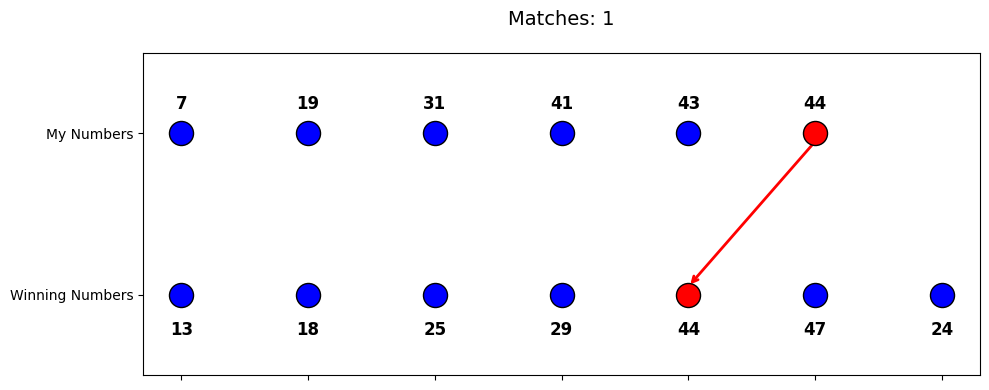

In [132]:
# =====================
# Juego de la Tinka:
# =====================
my_numbers = choose_random_numbers(6)
winning_numbers = simulate_tinka(include_boliyapa=True)  # Ganadores con boliyapa

plot_numbers(my_numbers, winning_numbers) 

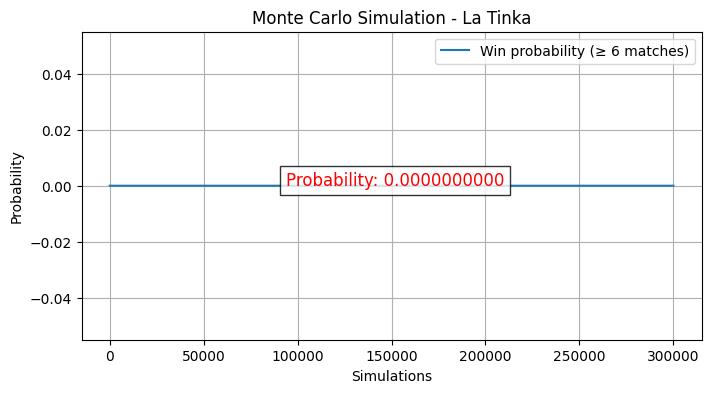

In [133]:
monte_carlo_tinka(choose_random_numbers(), wins_needed=6, simulations=300000)  

## Análisis de resultados previos

In [143]:
# Funciones

# 1. Frecuencia de aparición por número
def analyze_number_frequency(df):
    """
    Analiza la frecuencia de aparición de cada número en el histórico de la Tinka.
    
    Parameters:
        df (DataFrame): DataFrame con columnas 'fecha', 'bola', 'valor'
    
    Returns:
        DataFrame: Tabla con número y su frecuencia.
    """
    freq = df[df["bola"] != "Boliyapa"]["valor"].value_counts().sort_index()
    
    plt.figure(figsize=(10, 4))
    plt.bar(freq.index, freq.values)
    plt.xlabel("Número")
    plt.ylabel("Frecuencia")
    plt.title("Frecuencia de aparición de números (sin Boliyapa)")
    plt.grid(axis='y', linestyle="--", alpha=0.7)
    plt.show()
    
    return pd.DataFrame({"Número": freq.index, "Frecuencia": freq.values})

# 2. Números calientes y fríos
def hot_and_cold_numbers(df, recent_draws=10):
    """
    Encuentra números calientes y fríos en los últimos sorteos.
    
    Parameters:
        df (DataFrame): Histórico de la Tinka en formato largo.
        recent_draws (int): Número de sorteos recientes a considerar.
    
    Returns:
        tuple: (números calientes, números fríos)
    """
    recent_dates = df["fecha"].drop_duplicates().sort_values(ascending=False).head(recent_draws)
    recent_data = df[df["fecha"].isin(recent_dates)]
    
    freq_recent = recent_data[recent_data["bola"] != "Boliyapa"]["valor"].value_counts()
    hot_numbers = freq_recent.head(5).index.tolist()
    cold_numbers = freq_recent.tail(5).index.tolist()
    
    print(f"Números calientes (últimos {recent_draws} sorteos): {hot_numbers}")
    print(f"Números fríos (últimos {recent_draws} sorteos): {cold_numbers}")
    
    return hot_numbers, cold_numbers

# 3. Distribución pares/impares
def analyze_even_odd(df):
    """
    Analiza cuántos pares e impares suelen salir en cada sorteo.
    
    Parameters:
        df (DataFrame): Histórico de la Tinka.
    
    Returns:
        Series: Conteo de ocurrencias por cantidad de pares.
    """
    non_boliyapa = df[df["bola"] != "Boliyapa"]
    even_counts = non_boliyapa.groupby("fecha")["valor"].apply(lambda x: sum(n % 2 == 0 for n in x))
    
    dist = even_counts.value_counts().sort_index()
    plt.bar(dist.index, dist.values)
    plt.xlabel("Cantidad de números pares")
    plt.ylabel("Frecuencia de sorteos")
    plt.title("Distribución de pares en sorteos")
    plt.show()
    
    return dist

# 4. Distribución baja/alta
def analyze_low_high(df, split_point=25):
    """
    Analiza cuántos números bajos y altos suelen salir en cada sorteo.
    
    Parameters:
        df (DataFrame): Histórico de la Tinka.
        split_point (int): Número que divide el rango bajo/alto.
    
    Returns:
        Series: Conteo de ocurrencias por cantidad de bajos.
    """
    non_boliyapa = df[df["bola"] != "Boliyapa"]
    low_counts = non_boliyapa.groupby("fecha")["valor"].apply(lambda x: sum(n <= split_point for n in x))
    
    dist = low_counts.value_counts().sort_index()
    plt.bar(dist.index, dist.values)
    plt.xlabel(f"Cantidad de números ≤ {split_point}")
    plt.ylabel("Frecuencia de sorteos")
    plt.title("Distribución de números bajos en sorteos")
    plt.show()
    
    return dist


# 5. Análisis de combinaciones repetidas
def analyze_repeated_sequences(df_long):
    """
    Analiza cuántas veces se repiten combinaciones exactas de 6 números en el histórico.
    """
    combos = (df_long[df_long["bola"] != "Boliyapa"]
              .groupby("fecha")["valor"]
              .apply(lambda x: tuple(sorted(x))))
    
    combo_counts = combos.value_counts()
    repeated = combo_counts[combo_counts > 1]
    
    if repeated.empty:
        print("No hay combinaciones repetidas en el histórico.")
    else:
        print("Combinaciones repetidas:\n", repeated)

# 6. Análisis de números consecutivos
def analyze_consecutive_numbers(df_long):
    """
    Analiza cuántos pares de números consecutivos aparecen en cada sorteo.
    """
    counts = []
    
    for _, group in df_long[df_long["bola"] != "Boliyapa"].groupby("fecha"):
        nums = sorted(group["valor"])
        consecutive_pairs = sum((b - a) == 1 for a, b in zip(nums, nums[1:]))
        counts.append(consecutive_pairs)
    
    plt.figure(figsize=(6,4))
    sns.countplot(x=counts, palette="viridis")
    plt.title("Cantidad de pares consecutivos por sorteo")
    plt.xlabel("Pares consecutivos")
    plt.ylabel("Frecuencia")
    plt.show()

# 7. Análisis de transiciones (qué números siguen a otros en el sorteo siguiente)
def analyze_transitions(df_long, top_n=10):
    """
    Muestra una matriz de transición simple: frecuencia con la que un número aparece
    después de otro en el siguiente sorteo.
    """
    df_main = df_long[df_long["bola"] != "Boliyapa"].copy()
    df_main = df_main.sort_values("fecha")
    
    # Agrupar por fecha
    draws = df_main.groupby("fecha")["valor"].apply(set).tolist()
    
    transitions = Counter()
    for prev, curr in zip(draws, draws[1:]):
        for p in prev:
            for c in curr:
                transitions[(p, c)] += 1
    
    # Pasar a DataFrame
    df_trans = pd.DataFrame([
        {"prev": p, "curr": c, "count": cnt}
        for (p, c), cnt in transitions.items()
    ])
    
    top_pairs = df_trans.sort_values("count", ascending=False).head(top_n)
    
    plt.figure(figsize=(8,5))
    sns.barplot(data=top_pairs, x="count", y=top_pairs.apply(lambda r: f"{r.prev}→{r.curr}", axis=1), palette="magma")
    plt.title(f"Top {top_n} transiciones más frecuentes entre sorteos")
    plt.xlabel("Frecuencia")
    plt.ylabel("Transición")
    plt.show()

# 8. Análisis de números raros (menos frecuentes)
def analyze_rare_numbers(df_long, top_n=10):
    """
    Muestra los números menos frecuentes en el histórico.
    """
    nums = df_long[df_long["bola"] != "Boliyapa"]["valor"]
    freq = nums.value_counts().sort_values().head(top_n)
    
    plt.figure(figsize=(8,4))
    sns.barplot(x=freq.index, y=freq.values, palette="coolwarm")
    plt.title(f"Top {top_n} números menos frecuentes")
    plt.xlabel("Número")
    plt.ylabel("Frecuencia")
    plt.show()

In [134]:
# Lectura de datos
df_tinka = pd.read_excel('../Data/tinka_data.xlsx', sheet_name='data')
print(f'Cantidad de filas: {df_tinka.shape[0]} y columnas: {df_tinka.shape[1]}')
df_tinka.head()

Cantidad de filas: 1141 y columnas: 3


,fecha,bola,valor
0,2024-01-03,B1,4
1,2024-01-03,B2,12
2,2024-01-03,B3,15
3,2024-01-03,B4,28
4,2024-01-03,B5,35


In [135]:
# Aseguramos que fecha es datetime
df_tinka["fecha"] = pd.to_datetime(df_tinka["fecha"])

# Convertir el DataFrame de formato largo a formato ancho
df_wide = df_tinka.pivot(index="fecha", columns="bola", values="valor").reset_index()

# Ordenar columnas por B1, B2, ..., B6, Boliyapa
cols_order = ["fecha"] + [f"B{i}" for i in range(1, 7)] + ["Boliyapa"]
df_wide = df_wide[cols_order]

df_wide

bola,fecha,B1,B2,B3,B4,B5,B6,Boliyapa
0,2024-01-03,4,12,15,28,35,39,29
1,2024-01-07,1,4,7,18,27,33,31
2,2024-01-10,1,10,11,29,30,36,31
3,2024-01-14,20,27,28,41,44,47,43
4,2024-01-17,6,9,21,34,43,47,17
...,...,...,...,...,...,...,...,...
158,2025-07-23,1,2,13,22,24,43,21
159,2025-07-27,4,9,21,24,34,36,17
160,2025-07-30,1,3,9,25,28,43,23
161,2025-08-03,2,14,23,41,45,46,22


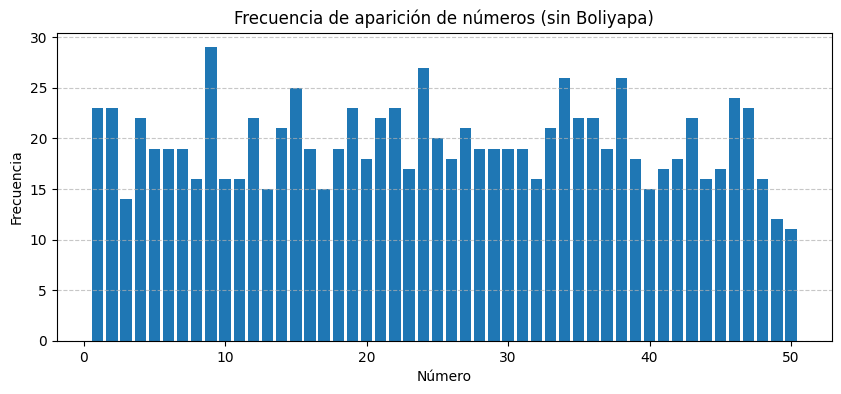

Números calientes (últimos 10 sorteos): [9, 24, 28, 43, 1]
Números fríos (últimos 10 sorteos): [4, 25, 41, 46, 33]


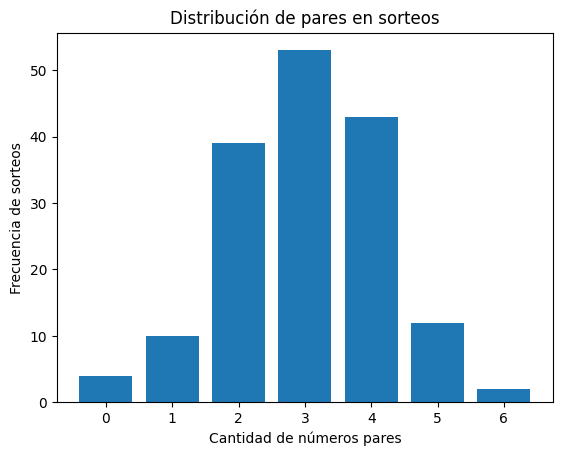

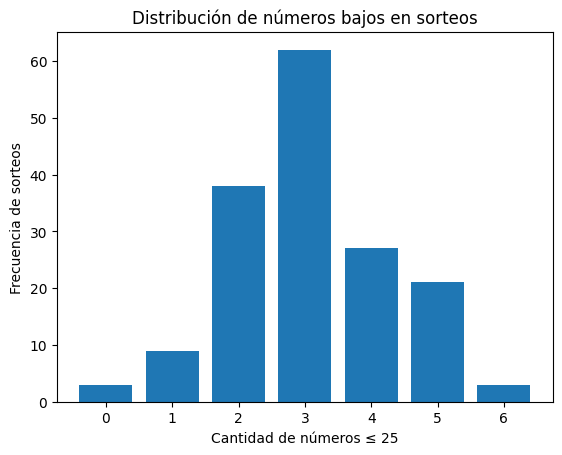

In [138]:
freq_table = analyze_number_frequency(df_tinka)
hot, cold = hot_and_cold_numbers(df_tinka, recent_draws=10)
even_distribution = analyze_even_odd(df_tinka)
low_high_distribution = analyze_low_high(df_tinka, split_point=25)

No hay combinaciones repetidas en el histórico.


C:\Users\gprad\AppData\Local\Temp\ipykernel_14676\3099610798.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=counts, palette="viridis")


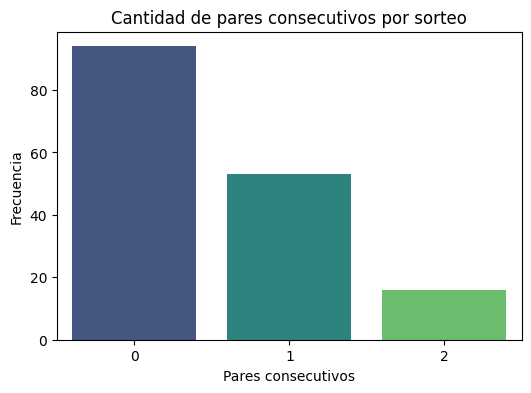

C:\Users\gprad\AppData\Local\Temp\ipykernel_14676\3099610798.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pairs, x="count", y=top_pairs.apply(lambda r: f"{r.prev}→{r.curr}", axis=1), palette="magma")


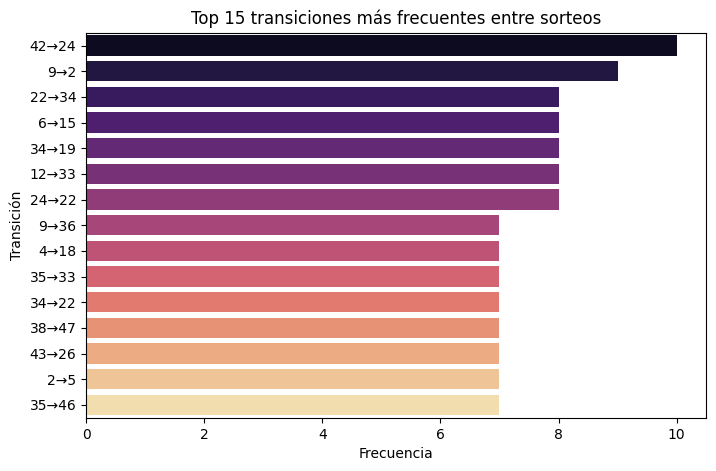

C:\Users\gprad\AppData\Local\Temp\ipykernel_14676\3099610798.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq.index, y=freq.values, palette="coolwarm")


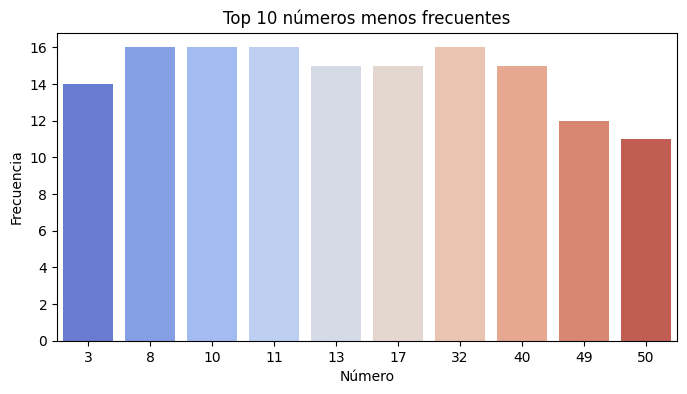

In [144]:
analyze_repeated_sequences(df_tinka)
analyze_consecutive_numbers(df_tinka)
analyze_transitions(df_tinka, top_n=15)
analyze_rare_numbers(df_tinka, top_n=10)